<a href="https://www.kaggle.com/code/sonawanelalitsunil/poultry-consumption-india-2025?scriptVersionId=221105815" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicken-consumption-in-india/chicken_consumption_india.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: blue; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid pink; padding: 15px; margin: 15px;">Chicken-Consumption-Analysis-India</p>

## The dataset Chicken-Consumption-Analysis-
**India would likely contain data that provides insights into the consumption patterns of chicken across various regions of India. This analysis could help in understanding trends,** 

**preferences, and factors influencing chicken consumption in the country. The dataset could include the following types of data:**

**Consumption Volumes: Data showing the amount of chicken consumed, either per capita or total consumption in different states or regions.**

**Demographics: Information on the age, gender, income groups, or other demographics influencing chicken consumption patterns.**

**Price Trends: Data showing fluctuations in the price of chicken over time, which could impact consumption patterns.**

**Seasonality: Data that captures seasonal variations in chicken consumption, such as higher demand during festivals or certain months.**

**Regional Variations: Information comparing consumption levels across different states or regions in India, which could be influenced by cultural, economic, or availability factors.**

**Consumer Preferences: Preferences for chicken cuts (whole, breasts, thighs, etc.), organic vs. conventional chicken, or fresh vs. frozen options.**

**Supply Chain and Production: Data on the production rates, chicken farming trends, and supply chain dynamics that affect the availability of chicken in different regions.**

**Nutritional Insights: Data on how chicken consumption correlates with nutritional trends or dietary habits in India.**

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Import Dependancies</p>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Import Dataset</p>

In [3]:
data =pd.read_csv("/kaggle/input/chicken-consumption-in-india/chicken_consumption_india.csv")

In [4]:
data.head()

,ID,Date,State,City,Age Group,Gender,Occupation,Household Size,Income Level (INR),Meal Type,...,Quantity Consumed (kg),Price per kg (INR),Source of Purchase,Consumption Frequency (per month),Preferred Cooking Method,Spice Level Preference,Awareness of Health Risks,Preference for Organic Chicken,Festive Season Impact,Leftovers Usage
0,1,2023-01-01,Rajasthan,Chandigarh,26-35,Female,Engineer,6,1L+,Dinner,...,1.46,382,Supermarket,13,Fried,Medium,No,Yes,No,No
1,2,2023-01-01,Tamil Nadu,Pune,60+,Female,Farmer,5,20K-50K,Dinner,...,2.10,299,Wholesale,25,Curry,Medium,Yes,No,Yes,No
2,3,2023-01-01,Punjab,Chandigarh,60+,Female,Farmer,5,1L+,Snack,...,1.03,280,Supermarket,18,Roasted,Medium,No,No,Yes,Yes
3,4,2023-01-01,Karnataka,Mumbai,26-35,Other,IT Professional,3,1L+,Breakfast,...,2.14,333,Supermarket,29,Roasted,Mild,Yes,Yes,No,No
4,5,2023-01-01,Rajasthan,Kolkata,26-35,Female,IT Professional,5,<20K,Lunch,...,0.47,265,Supermarket,16,Fried,Mild,Yes,No,Yes,No


In [5]:
data.tail()

,ID,Date,State,City,Age Group,Gender,Occupation,Household Size,Income Level (INR),Meal Type,...,Quantity Consumed (kg),Price per kg (INR),Source of Purchase,Consumption Frequency (per month),Preferred Cooking Method,Spice Level Preference,Awareness of Health Risks,Preference for Organic Chicken,Festive Season Impact,Leftovers Usage
99995,99996,2023-03-11,Karnataka,Jaipur,36-45,Other,Engineer,4,20K-50K,Dinner,...,2.20,321,Wholesale,16,Curry,Spicy,No,Yes,No,Yes
99996,99997,2023-03-11,Tamil Nadu,Delhi,36-45,Female,Business Owner,5,50K-1L,Dinner,...,1.69,359,Local Market,21,Fried,Medium,No,Yes,Yes,No
99997,99998,2023-03-11,Maharashtra,Pune,36-45,Male,Engineer,1,1L+,Breakfast,...,0.43,370,Wholesale,1,Fried,Mild,No,Yes,Yes,No
99998,99999,2023-03-11,Tamil Nadu,Ahmedabad,26-35,Other,Farmer,2,1L+,Breakfast,...,0.36,352,Local Market,1,Curry,Mild,Yes,No,Yes,Yes
99999,100000,2023-03-11,Maharashtra,Chandigarh,26-35,Female,Business Owner,1,50K-1L,Breakfast,...,0.27,392,Wholesale,4,Curry,Mild,No,No,Yes,No


In [6]:
data.dtypes

ID                                     int64
Date                                  object
State                                 object
City                                  object
Age Group                             object
Gender                                object
Occupation                            object
Household Size                         int64
Income Level (INR)                    object
Meal Type                             object
Chicken Type                          object
Quantity Consumed (kg)               float64
Price per kg (INR)                     int64
Source of Purchase                    object
Consumption Frequency (per month)      int64
Preferred Cooking Method              object
Spice Level Preference                object
Awareness of Health Risks             object
Preference for Organic Chicken        object
Festive Season Impact                 object
Leftovers Usage                       object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 100000 non-null  int64  
 1   Date                               100000 non-null  object 
 2   State                              100000 non-null  object 
 3   City                               100000 non-null  object 
 4   Age Group                          100000 non-null  object 
 5   Gender                             100000 non-null  object 
 6   Occupation                         100000 non-null  object 
 7   Household Size                     100000 non-null  int64  
 8   Income Level (INR)                 100000 non-null  object 
 9   Meal Type                          100000 non-null  object 
 10  Chicken Type                       100000 non-null  object 
 11  Quantity Consumed (kg)             10000

In [8]:
data.describe()

,ID,Household Size,Quantity Consumed (kg),Price per kg (INR),Consumption Frequency (per month)
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000
mean,50000.500000,3.99128,1.299885,274.50208,14.969930
std,28867.657797,2.00149,0.692594,72.09668,8.358573
min,1.000000,1.00000,0.100000,150.00000,1.000000
25%,25000.750000,2.00000,0.700000,212.00000,8.000000
50%,50000.500000,4.00000,1.300000,274.00000,15.000000
75%,75000.250000,6.00000,1.900000,337.00000,22.000000
max,100000.000000,7.00000,2.500000,399.00000,29.000000


In [9]:
data.columns

Index(['ID', 'Date', 'State', 'City', 'Age Group', 'Gender', 'Occupation',
       'Household Size', 'Income Level (INR)', 'Meal Type', 'Chicken Type',
       'Quantity Consumed (kg)', 'Price per kg (INR)', 'Source of Purchase',
       'Consumption Frequency (per month)', 'Preferred Cooking Method',
       'Spice Level Preference', 'Awareness of Health Risks',
       'Preference for Organic Chicken', 'Festive Season Impact',
       'Leftovers Usage'],
      dtype='object')

In [10]:
data.isnull().sum()

ID                                   0
Date                                 0
State                                0
City                                 0
Age Group                            0
Gender                               0
Occupation                           0
Household Size                       0
Income Level (INR)                   0
Meal Type                            0
Chicken Type                         0
Quantity Consumed (kg)               0
Price per kg (INR)                   0
Source of Purchase                   0
Consumption Frequency (per month)    0
Preferred Cooking Method             0
Spice Level Preference               0
Awareness of Health Risks            0
Preference for Organic Chicken       0
Festive Season Impact                0
Leftovers Usage                      0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;"> Data Visualization</p>

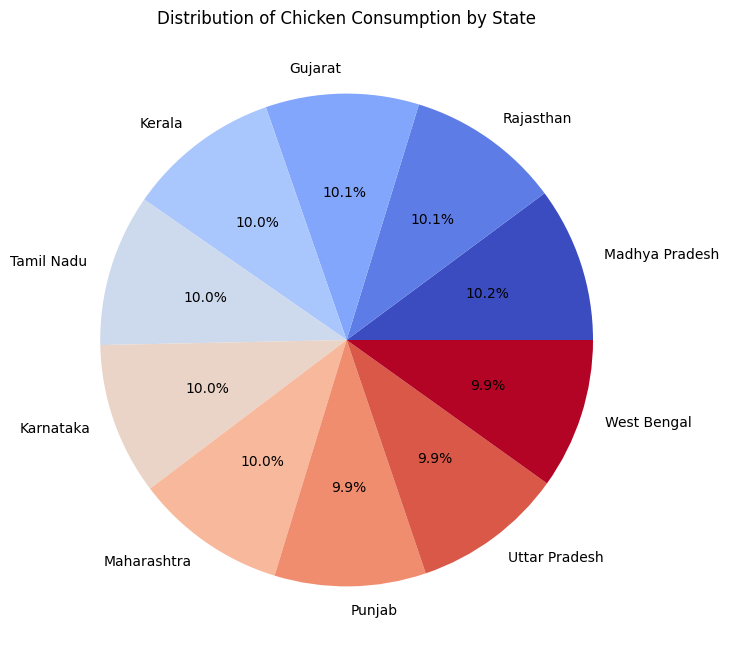

In [12]:
plt.figure(figsize=(8, 8))
data['State'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm', legend=False)
plt.title('Distribution of Chicken Consumption by State')
plt.ylabel('')
plt.show()


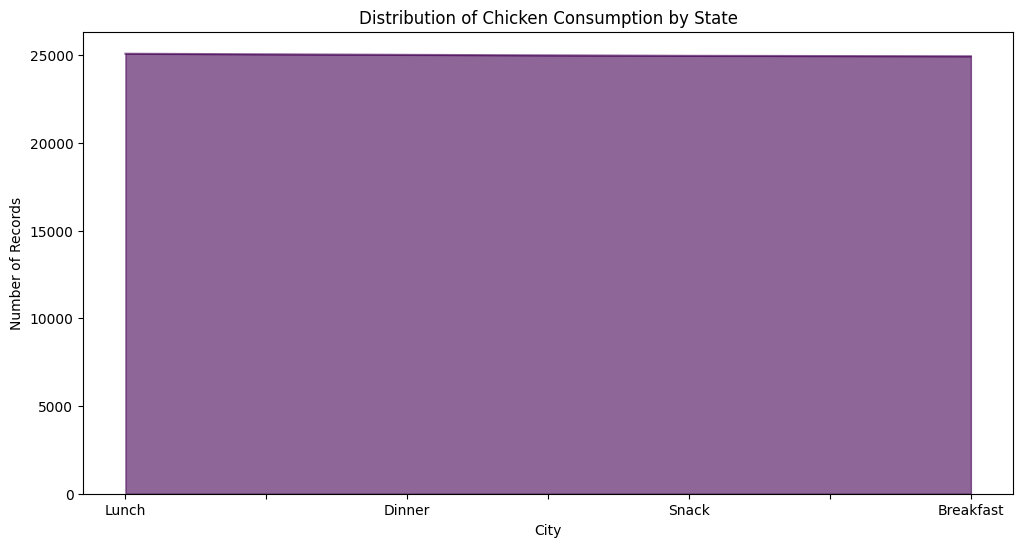

In [13]:
state_counts = data['Meal Type'].value_counts()
state_counts.plot(kind='area', colormap='viridis', figsize=(12, 6), alpha=0.6)
plt.title('Distribution of Chicken Consumption by State')
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.show()


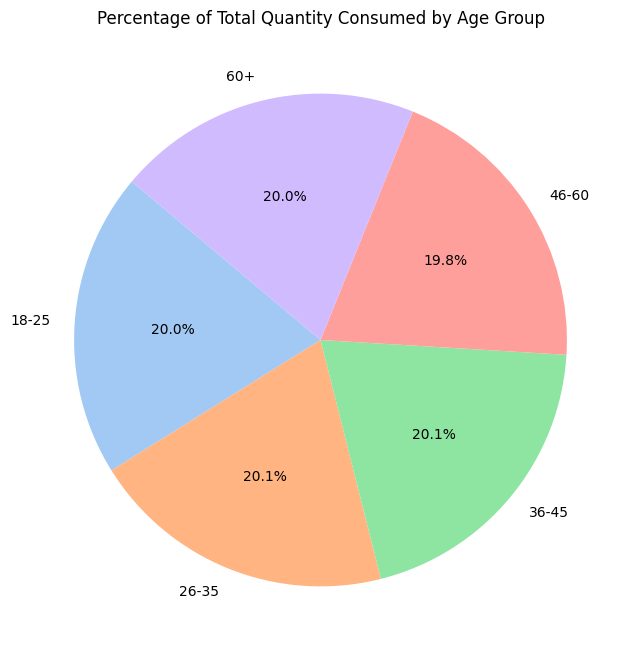

In [14]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel') 
data.groupby('Age Group')['Quantity Consumed (kg)'].sum().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of Total Quantity Consumed by Age Group')
plt.ylabel('')  
plt.show()

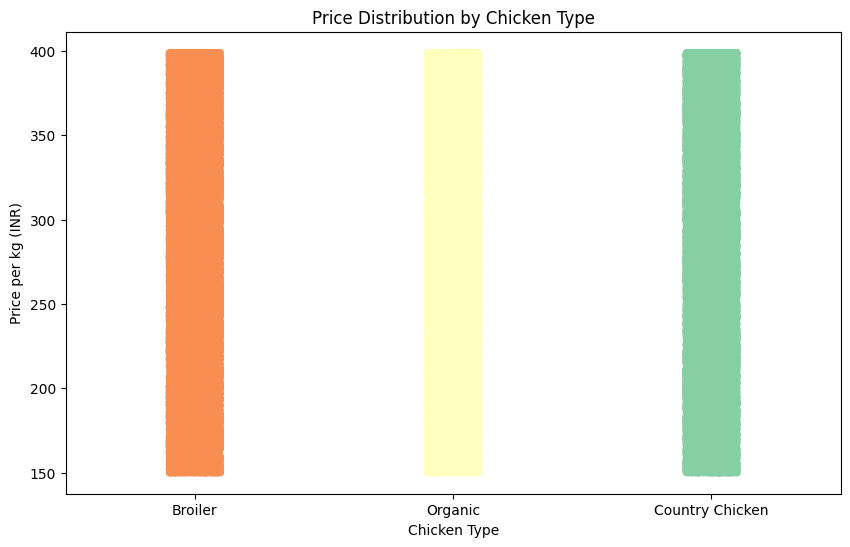

In [15]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Chicken Type', y='Price per kg (INR)', data=data, palette='Spectral', jitter=True)
plt.title('Price Distribution by Chicken Type')
plt.ylabel('Price per kg (INR)')
plt.xlabel('Chicken Type')
plt.show()

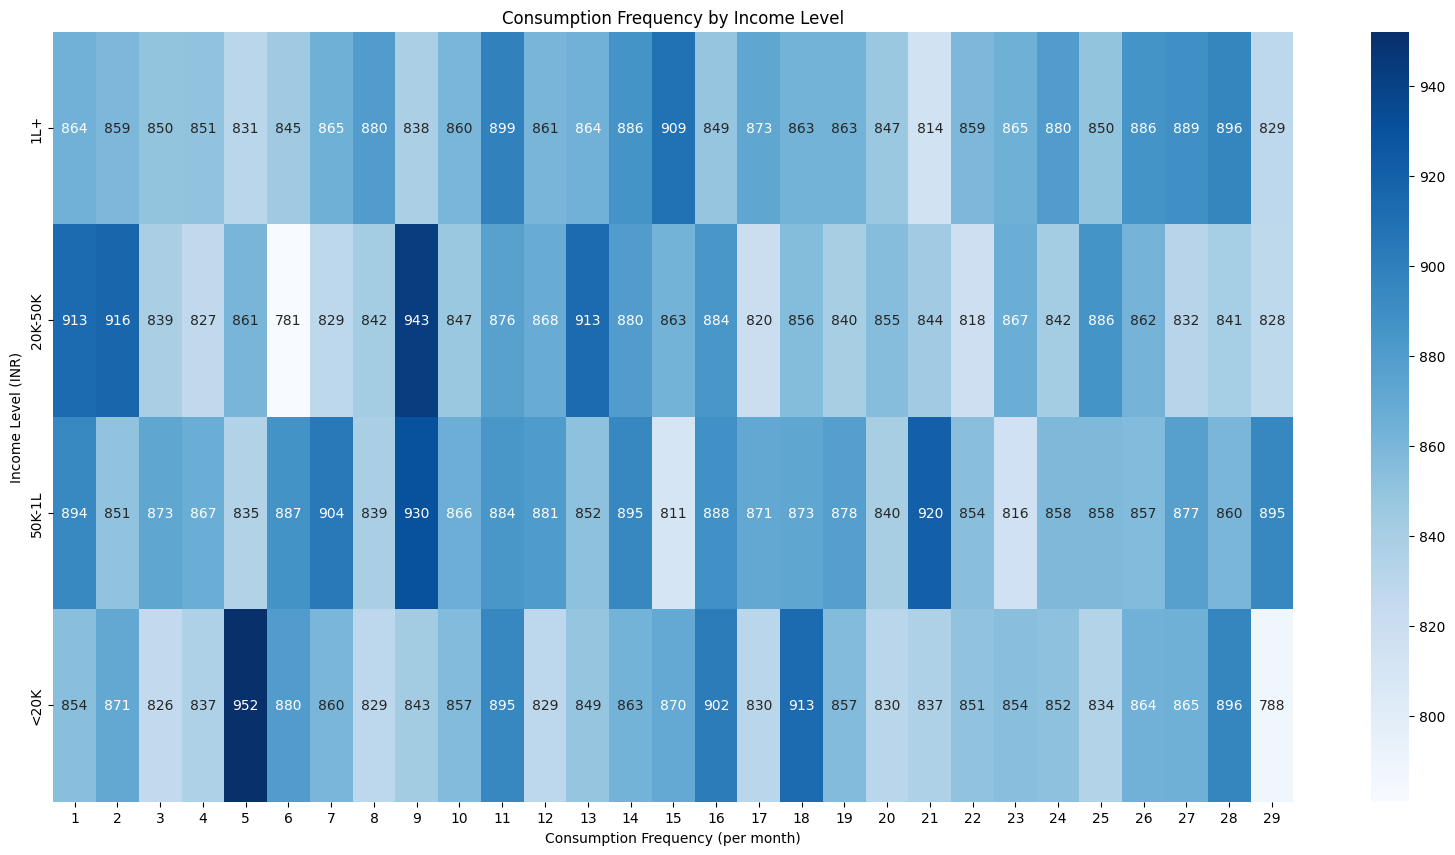

In [16]:
plt.figure(figsize=(20, 10))
pivot_table = data.pivot_table(index='Income Level (INR)', columns='Consumption Frequency (per month)', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Consumption Frequency by Income Level')
plt.xlabel('Consumption Frequency (per month)')
plt.ylabel('Income Level (INR)')
plt.show()


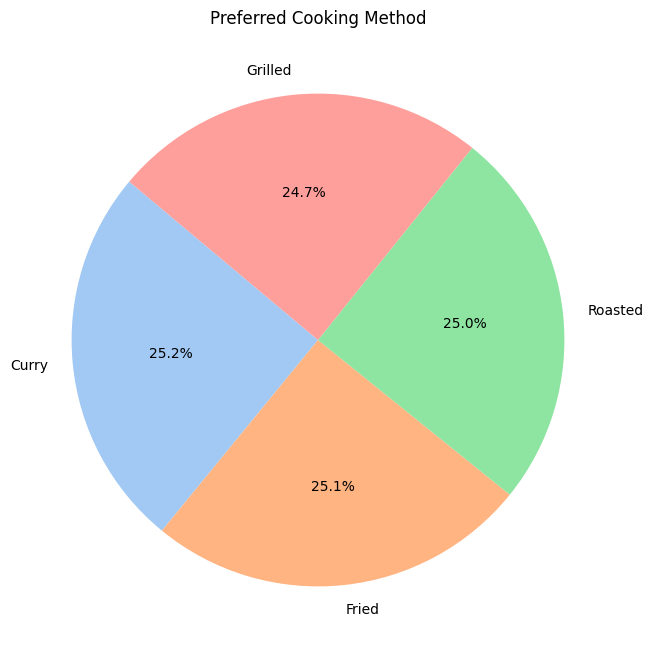

In [17]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
data['Preferred Cooking Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Preferred Cooking Method')
plt.ylabel('')
plt.show()

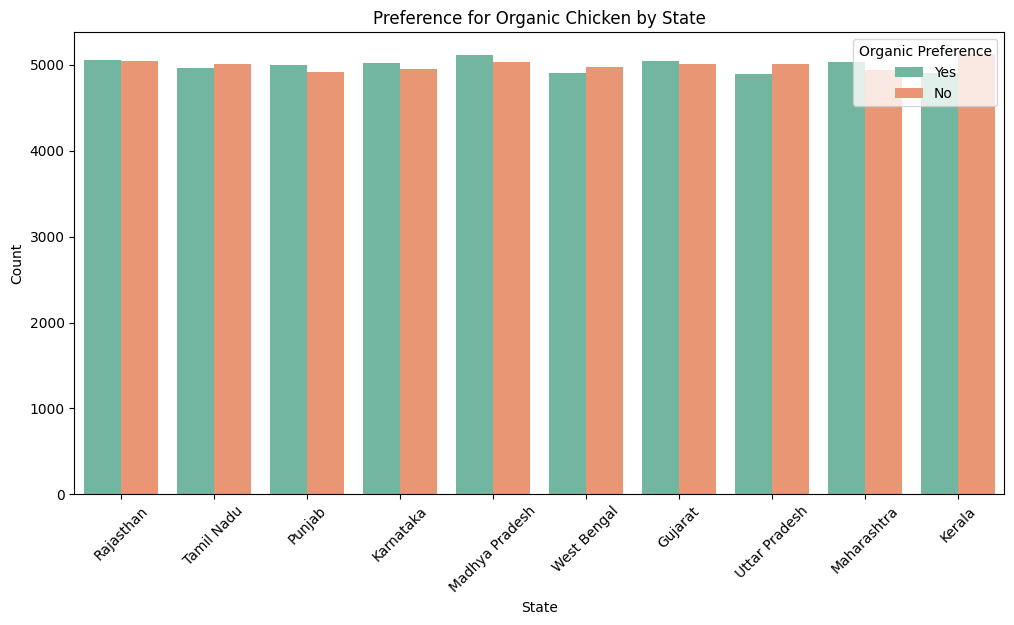

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', hue='Preference for Organic Chicken', data=data, palette='Set2')
plt.title('Preference for Organic Chicken by State')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Organic Preference')
plt.show()

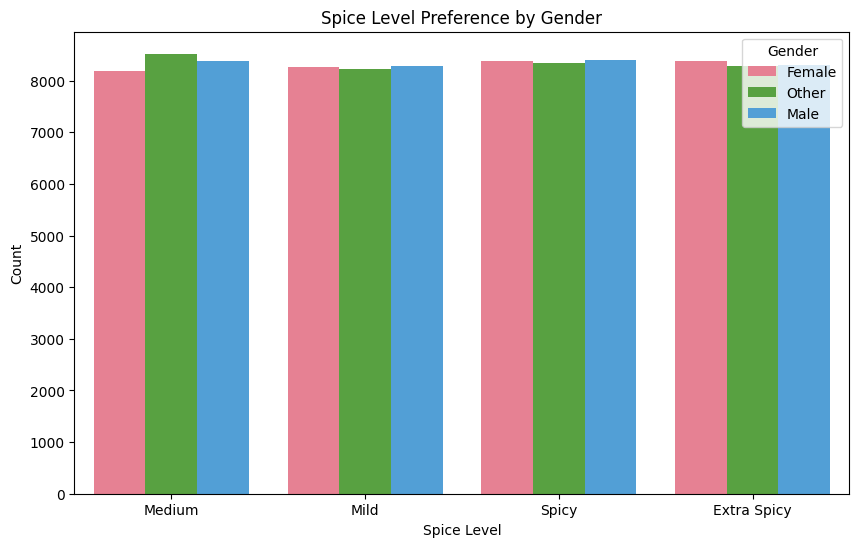

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Spice Level Preference', hue='Gender', data=data, palette='husl')
plt.title('Spice Level Preference by Gender')
plt.ylabel('Count')
plt.xlabel('Spice Level')
plt.show()

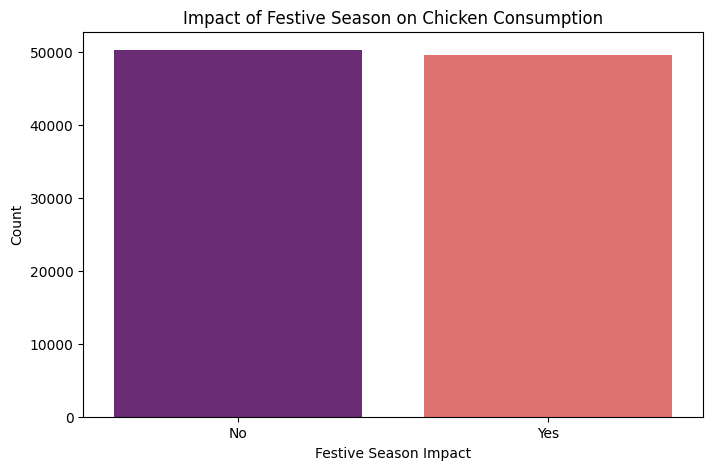

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Festive Season Impact', data=data, palette='magma')
plt.title('Impact of Festive Season on Chicken Consumption')
plt.ylabel('Count')
plt.xlabel('Festive Season Impact')
plt.show()

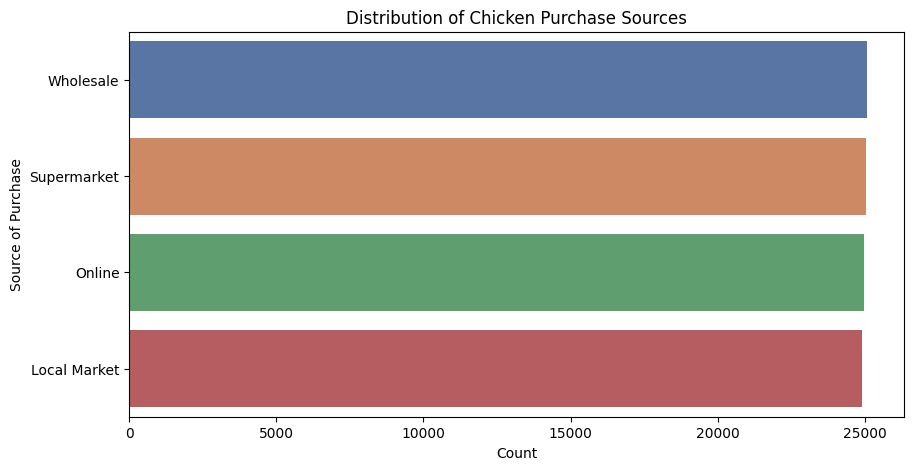

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Source of Purchase', data=data, palette='deep', order=data['Source of Purchase'].value_counts().index)
plt.title('Distribution of Chicken Purchase Sources')
plt.xlabel('Count')
plt.ylabel('Source of Purchase')
plt.show()

# <p style="padding:10px;background-color:#f8df01;margin:0;color:#102d02;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:15px 50px;overflow:hidden;font-weight:500;border: 3px solid #16e51e;">Thank you</p>